# Introduction

This notebook gives a brief introduction to AutoML (Automated Machine Learning) using AutoGluon:

https://auto.gluon.ai/


# TabularPredictor

As an example we use this dataset:

https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength

and will try to predict, e.g., the strength of concrete.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mchilamwar/predict-concrete-strength")

print("Path to dataset files:", path)

/home/juebrauer/miniconda3/envs/env_autogluon2/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/juebrauer/.cache/kagglehub/datasets/mchilamwar/predict-concrete-strength/versions/1


In [2]:
!ls {path}

ConcreteStrengthData.csv


In [3]:
import pandas
df = pandas.read_csv(path + "/ConcreteStrengthData.csv")
df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CementComponent,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAshComponent,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
WaterComponent,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
SuperplasticizerComponent,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregateComponent,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregateComponent,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
AgeInDays,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
# shuffle the data
df = df.sample(frac=1.0)

# split data into training and test data
N_train = int(len(df)*0.8)
df.iloc[:N_train].to_csv("concrete_strength_train.csv", index=False)
df.iloc[N_train:].to_csv("concrete_strength_test.csv", index=False)

In [7]:
from autogluon.tabular import TabularPredictor
model = TabularPredictor(label="Strength",
                         eval_metric="mean_absolute_percentage_error",
                         path="autogluon_concrete_strength_predictor")
model = model.fit("concrete_strength_train.csv", time_limit=4*60 )

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #37~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 20 10:25:38 UTC 2
CPU Count:          32
Pytorch Version:    2.9.1+cu128
CUDA Version:       12.8
GPU Memory:         GPU 0: 11.60/11.60 GB
Total GPU Memory:   Free: 11.60 GB, Allocated: 0.00 GB, Total: 11.60 GB
GPU Count:          1
Memory Avail:       22.59 GB / 31.03 GB (72.8%)
Disk Space Avail:   14.41 GB / 195.80 GB (7.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme'  : New in v1.5: The state-of-the-art for tabular data. Massively better than 'best' on datasets <100000 samples by using new

[1000]	valid_set's l2: 19.3145	valid_set's mean_absolute_percentage_error: -0.100411
[2000]	valid_set's l2: 17.1135	valid_set's mean_absolute_percentage_error: -0.0904582
[3000]	valid_set's l2: 16.9323	valid_set's mean_absolute_percentage_error: -0.0892474
[4000]	valid_set's l2: 16.9639	valid_set's mean_absolute_percentage_error: -0.0876465
[5000]	valid_set's l2: 17.1053	valid_set's mean_absolute_percentage_error: -0.0871346
[6000]	valid_set's l2: 17.2275	valid_set's mean_absolute_percentage_error: -0.0868774
[7000]	valid_set's l2: 17.3106	valid_set's mean_absolute_percentage_error: -0.0867894
[8000]	valid_set's l2: 17.431	valid_set's mean_absolute_percentage_error: -0.0863674
[9000]	valid_set's l2: 17.5805	valid_set's mean_absolute_percentage_error: -0.0863009
[10000]	valid_set's l2: 17.6846	valid_set's mean_absolute_percentage_error: -0.0864485


	-0.0861	 = Validation score   (-mean_absolute_percentage_error)
	6.18s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 233.71s of the 233.71s of remaining time.
	Fitting with cpus=24, gpus=0, mem=0.0/22.4 GB


[1000]	valid_set's l2: 18.6208	valid_set's mean_absolute_percentage_error: -0.0870647


	-0.087	 = Validation score   (-mean_absolute_percentage_error)
	1.07s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 232.62s of the 232.62s of remaining time.
	Fitting with cpus=32, gpus=0
	-0.1273	 = Validation score   (-mean_absolute_percentage_error)
	0.55s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 231.96s of the 231.96s of remaining time.
	Fitting with cpus=24, gpus=0
	-0.155	 = Validation score   (-mean_absolute_percentage_error)
	0.82s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 231.14s of the 231.14s of remaining time.
	Fitting with cpus=32, gpus=0
	-0.1311	 = Validation score   (-mean_absolute_percentage_error)
	0.64s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 230.36s of the 230.36s of remaining time.
	Fitting with cpus=24, 

[1000]	valid_set's l2: 27.1138	valid_set's mean_absolute_percentage_error: -0.124032
[2000]	valid_set's l2: 27.1249	valid_set's mean_absolute_percentage_error: -0.12395
[3000]	valid_set's l2: 27.1355	valid_set's mean_absolute_percentage_error: -0.12394
[4000]	valid_set's l2: 27.1394	valid_set's mean_absolute_percentage_error: -0.123934
[5000]	valid_set's l2: 27.1409	valid_set's mean_absolute_percentage_error: -0.123934


	-0.1239	 = Validation score   (-mean_absolute_percentage_error)
	11.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 239.98s of the 193.38s of remaining time.
	Fitting 1 model on all data | Fitting with cpus=32, gpus=0, mem=0.0/21.8 GB
	Ensemble Weights: {'LightGBMXT': 0.526, 'NeuralNetTorch': 0.368, 'XGBoost': 0.105}
	-0.078	 = Validation score   (-mean_absolute_percentage_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 46.66s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 10979.0 rows/s (165 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/media/veracrypt1/30_fb/03_kursdurchfuehrungen/2025/2025-12-04_wifi_ds4_dezember25/notebooks_von_juergen/autogluon_concrete_strength_predictor")


In [8]:
model.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.077970,mean_absolute_percentage_error,0.015029,30.040128,0.000463,0.028870,2,True,10
1,LightGBMXT,-0.086145,mean_absolute_percentage_error,0.008107,6.180197,0.008107,6.180197,1,True,1
2,LightGBM,-0.086971,mean_absolute_percentage_error,0.001491,1.074162,0.001491,1.074162,1,True,2
3,XGBoost,-0.092391,mean_absolute_percentage_error,0.003400,1.566037,0.003400,1.566037,1,True,7
4,NeuralNetTorch,-0.092954,mean_absolute_percentage_error,0.003060,22.265025,0.003060,22.265025,1,True,8
5,LightGBMLarge,-0.123934,mean_absolute_percentage_error,0.012108,11.804524,0.012108,11.804524,1,True,9
6,RandomForestMSE,-0.127251,mean_absolute_percentage_error,0.079410,0.553181,0.079410,0.553181,1,True,3
7,ExtraTreesMSE,-0.131099,mean_absolute_percentage_error,0.111359,0.638202,0.111359,0.638202,1,True,5
8,CatBoost,-0.155049,mean_absolute_percentage_error,0.000616,0.815416,0.000616,0.815416,1,True,4
9,NeuralNetFastAI,-0.197049,mean_absolute_percentage_error,0.005912,0.992203,0.005912,0.992203,1,True,6


In [9]:
# Make new predictions!
from autogluon.tabular import TabularPredictor
model = TabularPredictor.load("autogluon_concrete_strength_predictor")

import pandas
df_test = pandas.read_csv("concrete_strength_test.csv")

model.predict(df_test)

0      32.281208
1      41.359932
2      17.401991
3      48.402496
4      65.138802
         ...    
201    65.138802
202    40.612148
203    20.122999
204    43.505615
205    31.511795
Name: Strength, Length: 206, dtype: float32

In [10]:
model.evaluate(df_test)

{'mean_absolute_percentage_error': -0.053935411173510445,
 'root_mean_squared_error': np.float64(-2.593700288589347),
 'mean_squared_error': -6.727281187028463,
 'mean_absolute_error': -1.774652124516015,
 'r2': 0.9786983885310943,
 'pearsonr': 0.9899181027973704,
 'median_absolute_error': -1.2182491111755356}

# TimeSeriesPredictor

We will do a forecast for bike sharing in London.

Dataset:

https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/juebrauer/.cache/kagglehub/datasets/hmavrodiev/london-bike-sharing-dataset/versions/1


In [12]:
!ls {path}

london_merged.csv


In [13]:
import pandas
df = pandas.read_csv(path + "/london_merged.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [15]:
df['timestamp'] = pandas.to_datetime(df['timestamp'])
df = df.set_index("timestamp", drop=False)

# We need to have an "time series ID (item id)" column in AutoGluon
# AutoGluon needs this in order to differ between the time series
df['series_id'] = 'London'

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,series_id
timestamp,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,London
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,London
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,London
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,London
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,London


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  series_id     17414 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.6+ MB


In [18]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [19]:
# prepare train period
df.loc["2015-01" : "2016-09"].to_csv("london_bikes_train.csv", index=False)

# prepare test period / ground truth data to compare forecast with
df.loc["2016-10-01" : "2016-10-14"].to_csv("london_bikes_test.csv", index=False)

In [20]:
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

train_data = TimeSeriesDataFrame.from_data_frame(
    "london_bikes_train.csv",
    id_column="series_id",
    timestamp_column="timestamp"
)

model = TimeSeriesPredictor(
    prediction_length=48,  # Predict the next 48 hours
    target="cnt",
    eval_metric="MASE",
    freq='h',  # <--- Explicitly tell it "This is Hourly data"
    path="autogluon_london_bikesharing_predictor"
)

model.fit(
    train_data,
    presets="best_quality",
    time_limit=6*60
)

Loaded data from: london_bikes_train.csv | Columns = 11 / 11 | Rows = 15136 -> 15136
Beginning AutoGluon training... Time limit = 360s
AutoGluon will save models to '/media/veracrypt1/30_fb/03_kursdurchfuehrungen/2025/2025-12-04_wifi_ds4_dezember25/notebooks_von_juergen/autogluon_london_bikesharing_predictor'
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #37~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 20 10:25:38 UTC 2
CPU Count:          32
Pytorch Version:    2.9.1+cu128
CUDA Version:       12.8
GPU Memory:         GPU 0: 11.60/11.60 GB
Total GPU Memory:   Free: 11.60 GB, Allocated: 0.00 GB, Total: 11.60 GB
GPU Count:          1
Memory Avail:       21.81 GB / 31.03 GB (70.3%)
Disk Space Avail:   14.45 GB / 195.80 GB (7.4%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'h',
 'hyperparame

Loading predictor from path /media/veracrypt1/30_fb/03_kursdurchfuehrungen/2025/2025-12-04_wifi_ds4_dezember25/notebooks_von_juergen/autogluon_london_bikesharing_predictor
data with frequency 'IRREG' has been resampled to frequency 'h'.


['SeasonalNaive', 'RecursiveTabular', 'DirectTabular', 'DynamicOptimizedTheta', 'Chronos2', 'Chronos2SmallFineTuned', 'AutoETS', 'ChronosWithRegressor[bolt_small]', 'TemporalFusionTransformer', 'DeepAR', 'WeightedEnsemble']


Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


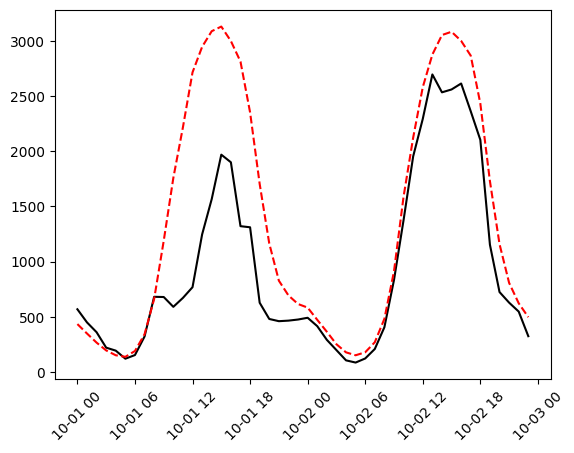

In [23]:
import pandas
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import matplotlib.pyplot as plt

# 1. Reload model
path = "autogluon_london_bikesharing_predictor"
model = TimeSeriesPredictor.load(path)
print(model.model_names())

# 2. Read in data for which to do a forecast
df = pandas.read_csv("london_bikes_train.csv")
df['timestamp'] = pandas.to_datetime(df['timestamp'])
df = df.set_index("timestamp", drop=False)
df["series_id"] = "London"
input_timeseries = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="series_id",
    timestamp_column="timestamp"
)

# 3. Read in ground truth data
df_gt = pandas.read_csv("london_bikes_test.csv")
df_gt['timestamp'] = pandas.to_datetime(df_gt['timestamp'])
df_gt = df_gt.set_index("timestamp", drop=False)
gt_data = df_gt.iloc[:48]

# 4. Predict / Forecast with the best model
preds = model.predict( input_timeseries )

# 5. Visualize ground truth vs. predictions
plt.plot(gt_data["cnt"], color="black")
plt.plot(preds["mean"]["London"], color="red", linestyle="--")
plt.xticks(rotation=45)
plt.show()

In [24]:
preds.head()

mean         0.1         0.2         0.3  \
item_id timestamp                                                             
London  2016-10-01 00:00:00  433.801668  263.991269  359.855450  362.248049   
        2016-10-01 01:00:00  348.244527  215.367909  295.949947  304.195405   
        2016-10-01 02:00:00  265.820310  159.628516  223.930094  232.770287   
        2016-10-01 03:00:00  195.028084  111.885587  160.920842  168.599774   
        2016-10-01 04:00:00  151.072074   81.937652  116.864570  124.635932   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
London  2016-10-01 00:00:00  430.295554  433.801668  447.285564  493.077520   
        2016-10-01 01:00:00  340.646622  348.244527  366.750253  402.288803   
        2016-10-01 02:00:00  257.487726  265.820310  285.187731  312.101934   
        2016-10-01 03:00:00  190.375640  195.028084  211.884288  234.599910   
        2016-10-01 04:00:00  149.307332  151.072074  166.123693  182.814087   

                                    0.8         0.9  
item_id timestamp                                    
London  2016-10-01 00:00:00  483.834746  538.726969  
        2016-10-01 01:00:00  394.062192  437.638835  
        2016-10-01 02:00:00  303.161345  337.775189  
        2016-10-01 03:00:00  222.738308  257.921681  
        2016-10-01 04:00:00  169.119836  209.199752

data with frequency 'IRREG' has been resampled to frequency 'h'.


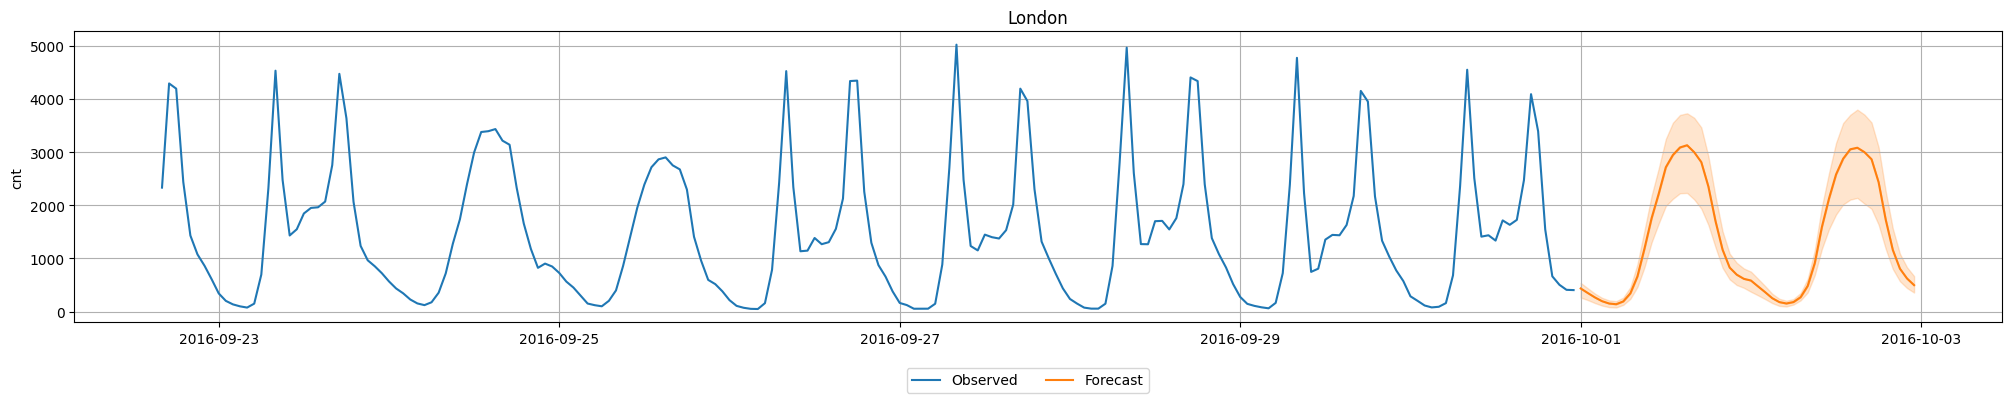

In [25]:
# Use AutoGluon's prediction visualization function
import matplotlib.pyplot as plt
model.plot(data=input_timeseries, predictions=preds, item_ids=['London'], max_history_length=200)
plt.show()

In [26]:
model.model_names()

['SeasonalNaive',
 'RecursiveTabular',
 'DirectTabular',
 'DynamicOptimizedTheta',
 'Chronos2',
 'Chronos2SmallFineTuned',
 'AutoETS',
 'ChronosWithRegressor[bolt_small]',
 'TemporalFusionTransformer',
 'DeepAR',
 'WeightedEnsemble']

data with frequency 'IRREG' has been resampled to frequency 'h'.


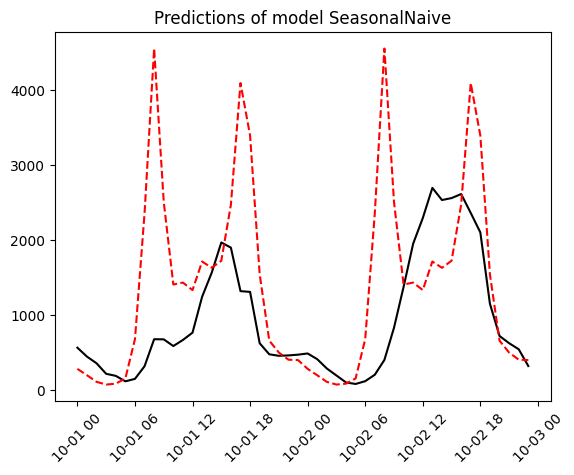

data with frequency 'IRREG' has been resampled to frequency 'h'.


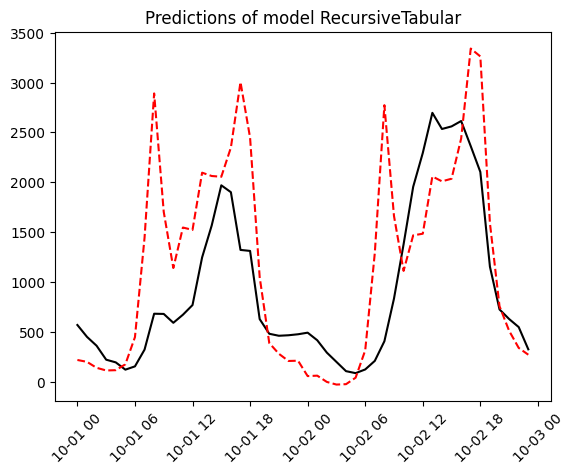

data with frequency 'IRREG' has been resampled to frequency 'h'.


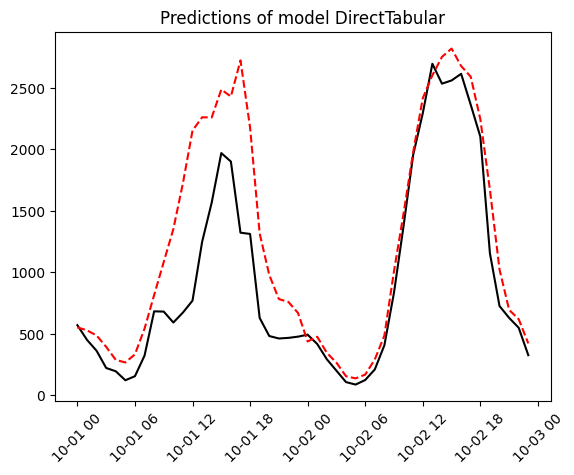

data with frequency 'IRREG' has been resampled to frequency 'h'.


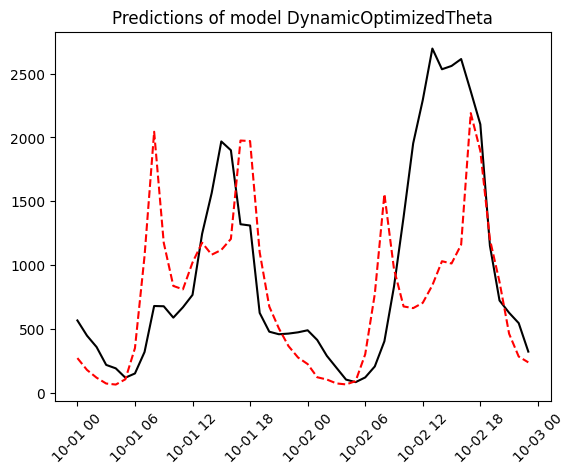

data with frequency 'IRREG' has been resampled to frequency 'h'.


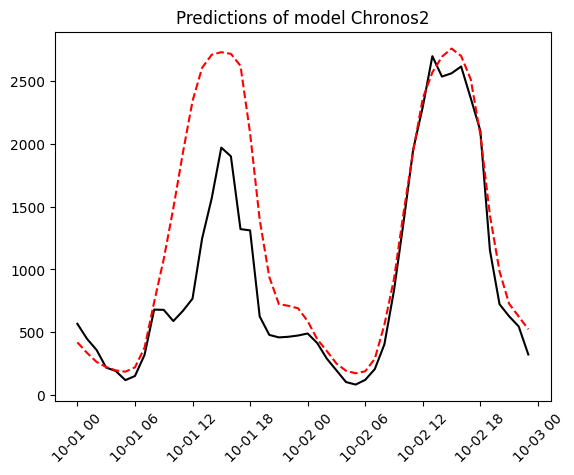

data with frequency 'IRREG' has been resampled to frequency 'h'.


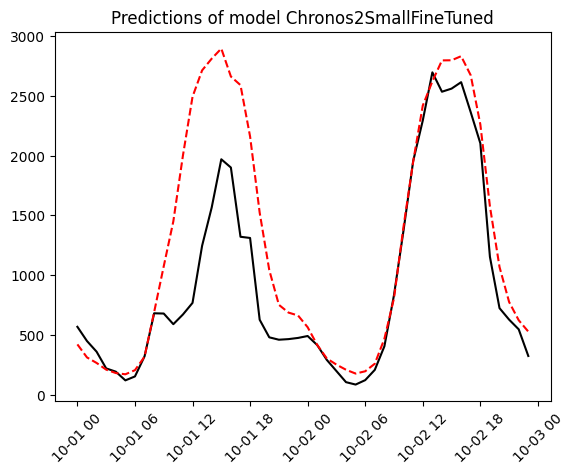

data with frequency 'IRREG' has been resampled to frequency 'h'.


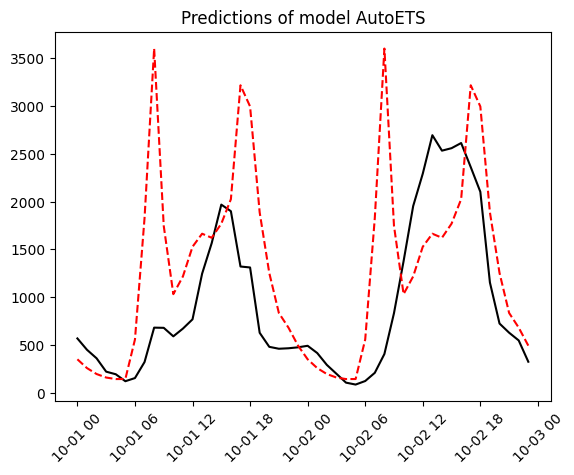

data with frequency 'IRREG' has been resampled to frequency 'h'.


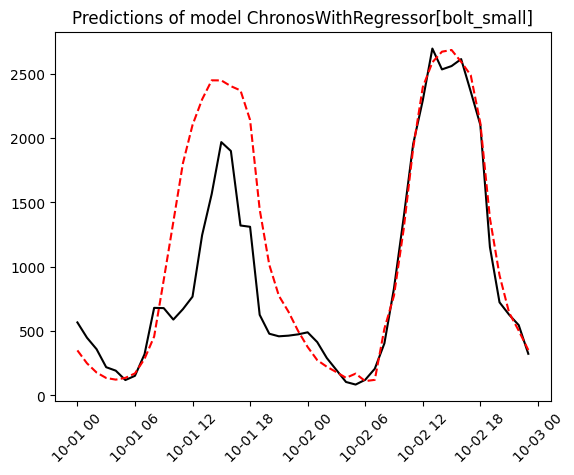

data with frequency 'IRREG' has been resampled to frequency 'h'.


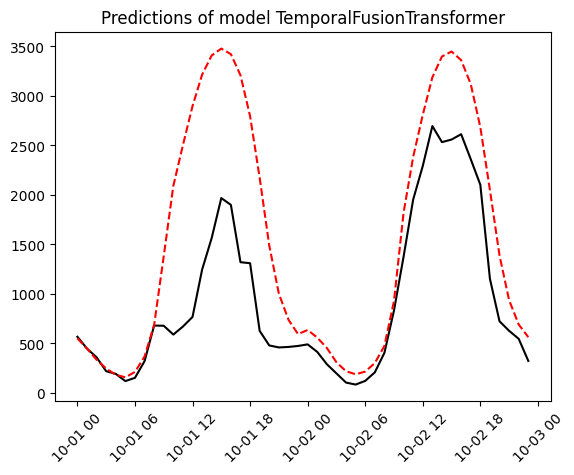

data with frequency 'IRREG' has been resampled to frequency 'h'.


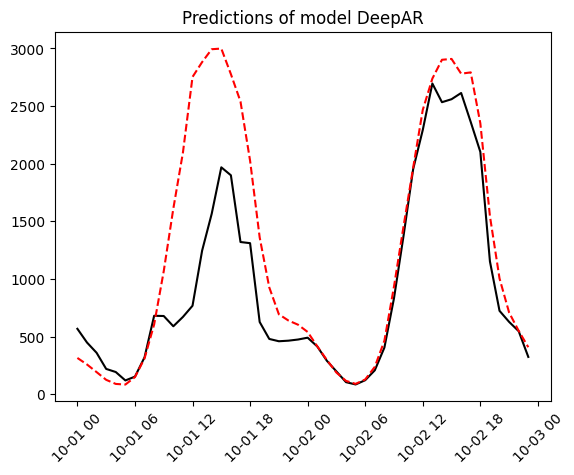

data with frequency 'IRREG' has been resampled to frequency 'h'.


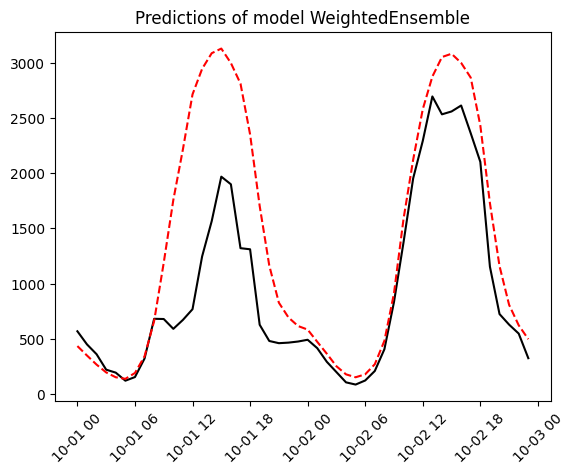

In [27]:
for model_name in model.model_names():

    # Predict / Forecast with specific model
    preds = model.predict( input_timeseries, model=model_name )

    import matplotlib.pyplot as plt
    plt.plot(gt_data["cnt"], color="black")
    plt.plot(preds["mean"]["London"], color="red", linestyle="--")
    plt.xticks(rotation=45)
    plt.title(f"Predictions of model {model_name}")
    plt.show()

# Decompose time series

True


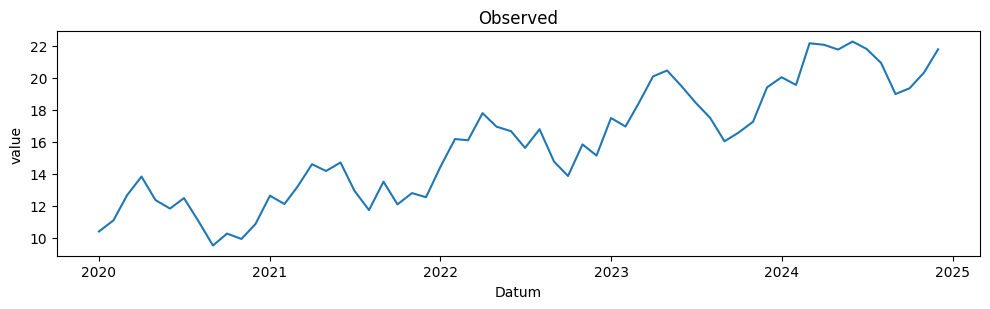

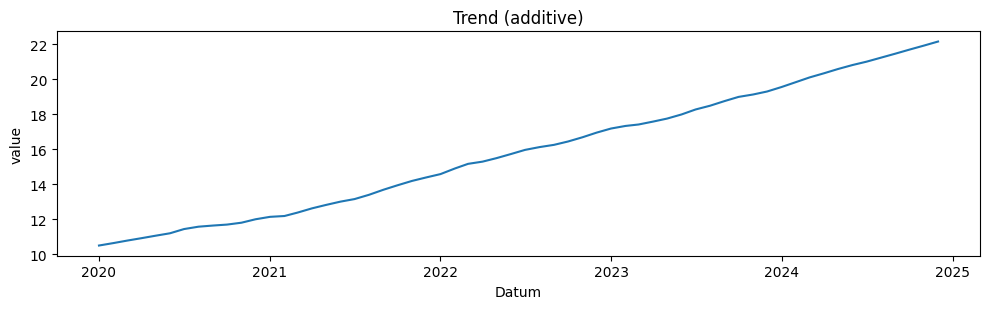

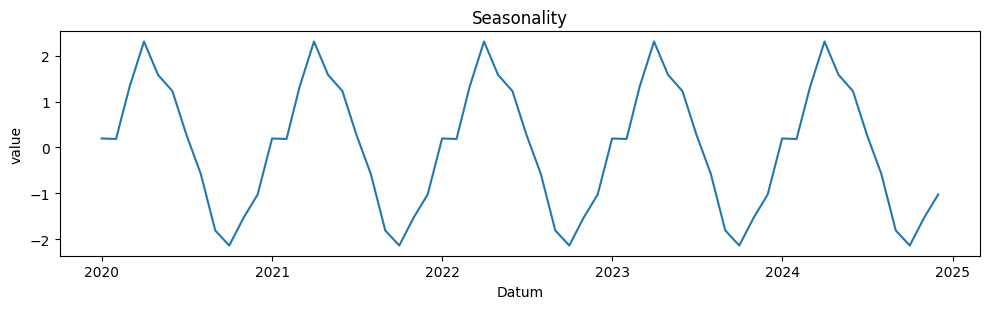

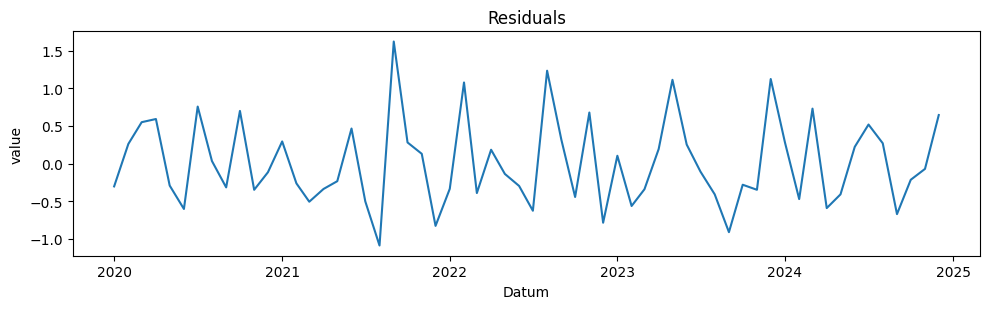

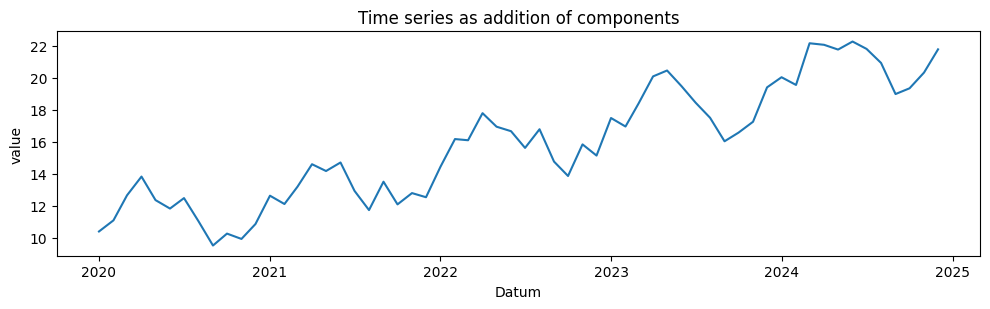

In [28]:
# Additive time series decomposition with visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Try to use statsmodels; if unavailable, fall back to a simple manual additive decomposition
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    HAVE_SM = True
except Exception:
    HAVE_SM = False

print(HAVE_SM)

# 1. Generate synthetic time series (5 years)
rng = pd.date_range("2020-01-01", periods=5*12, freq="MS")
np.random.seed(42)

trend = np.linspace(10, 22, len(rng))  # linearer Trend
seasonal_true = 2*np.sin(2*np.pi * (rng.month-1)/12)  # jährliche Saisonalität
noise = np.random.normal(0, 0.8, len(rng))

y = trend + seasonal_true + noise
ts = pd.Series(y, index=rng, name="Beispielreihe")

# 2. Decompose with additived model
if HAVE_SM:
    decomp = seasonal_decompose(ts, model="additive", period=12, extrapolate_trend="freq")
    observed = decomp.observed
    trend_est = decomp.trend
    seasonal_est = decomp.seasonal
    resid = decomp.resid
else:
    # Trend: moving average with window=12 (months), centered
    trend_est = ts.rolling(window=12, center=True, min_periods=6).mean()
    # Detrend
    detrended = ts - trend_est
    # Seasonal component: mean per month (and all years), map to index
    month_avgs = detrended.groupby(detrended.index.month).mean()
    seasonal_est = ts.index.month.map(month_avgs).to_series(index=ts.index)
    # Residuals
    resid = ts - trend_est - seasonal_est
    observed = ts

# 3. Visualization helper function
def make_plot(series, title, ylabel):
    plt.figure(figsize=(10, 3.2))
    plt.plot(series.index, series.values)
    plt.title(title)
    plt.xlabel("Datum")
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

make_plot(observed, "Observed", "value")
make_plot(trend_est, "Trend (additive)", "value")
make_plot(seasonal_est, "Seasonality", "value")
make_plot(resid, "Residuals", "value")
make_plot(trend_est + seasonal_est + resid, "Time series as addition of components", "value")

# Covariates

- In AutoGluon TimeSeriesPredictor, covariates are extra variables that help predict the target time series.
- They provide additional context beyond past target values.
- There are three main types of covariates.
    - Past covariates are known only up to the current time (e.g., past demand or sensor data).
    - Known (future) covariates are available in advance, including the forecast horizon (e.g., holidays or planned promotions).
    - Static covariates do not change over time and describe each series (e.g., store location or product category).
- Covariates help models learn seasonality and external effects.
- They improve accuracy, especially for longer forecasts.
- Only use covariates that are truly available at prediction time.

## Generate train/test data

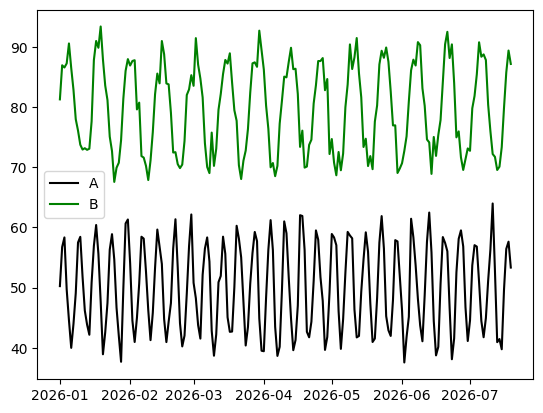

In [80]:
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

rng = np.random.default_rng(0)

# We will simulate N days
N = 2*365
dates = pd.date_range("2026-01-01", periods=N, freq="D")

# We will simulate two time series
time_series_ids = ["A", "B"]

# Simulate two time series
rows = []
    
# Simulate each day
for t, ts in enumerate(dates):

    for time_series_id in time_series_ids:

        # Give the time series a different y-intercept
        if time_series_id == "A":
            base = 50
            seasonality = 7
        elif time_series_id == "B":
            base = 80
            seasonality = 14
    
    
        # simulate time series value with weekly seasonality
        y = base + 10*np.sin(2*np.pi*t/seasonality) + rng.normal(0, 2)
    
        # simulate past covariate: temperature (yearly seasonality)
        # The temperatur will not be known for the forecast horizon!
        temp = 15 + 8*np.sin(2*np.pi*t/365) + rng.normal(0, 1)
    
        # simulate known covariates: DayOfWeek (dow), Weekend (is_weekend)
        # This will be known in advance for the forecast horizon
        dow = ts.dayofweek
        is_weekend = int(dow >= 5)
    
        # New data row for our table to be created
        rows.append(
            {"series_id": time_series_id,
             "timestamp": ts,
             "target": y,
             "temp": temp,
             "day_of_week": dow,
              "is_weekend": is_weekend}
        )

# create table
df = pd.DataFrame(rows)

# split into train und test data
# save training data
df.iloc[:N//2].to_csv("timeseries_train.csv", index=False)
# save test data
df.iloc[N//2:].to_csv("timeseries_test.csv", index=False)

# plot start of training data
import matplotlib.pyplot as plt
df_A = df.query("series_id=='A'").head(200)
df_B = df.query("series_id=='B'").head(200)
plt.plot(df_A["timestamp"], df_A["target"], color="black", label="A" )
plt.plot(df_B["timestamp"], df_B["target"], color="green", label="B" )
plt.legend()
plt.show()

## Train the time series predictor

In [81]:
# Now, re-read the training data to prepare for training
import pandas
df_train = pandas.read_csv("timeseries_train.csv", parse_dates=["timestamp"])

# This is mandatory in order to use the TimeSeriesPredictor
ts_train = TimeSeriesDataFrame.from_data_frame(
    df_train,
    id_column="series_id",
    timestamp_column="timestamp"
)


# Now, let us train a time series predictor
prediction_length = 28

model = TimeSeriesPredictor(
    path="autogluon_ts_predictor_using_covariates",
    target="target",
    prediction_length=prediction_length,
    freq="D",
    known_covariates_names=["day_of_week", "is_weekend"],
)

# "temp" will be automatically detected as "past covariate"
# since it is not a target and not a known covariate
model.fit(
    train_data=ts_train,
    presets="medium_quality",
)

Beginning AutoGluon training...
AutoGluon will save models to '/media/veracrypt1/09_src/examples/015_automl_with_autogluon/autogluon_ts_predictor_using_covariates'
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #37~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 20 10:25:38 UTC 2
CPU Count:          32
Pytorch Version:    2.9.1+cu128
CUDA Version:       12.8
GPU Memory:         GPU 0: 11.59/11.60 GB
Total GPU Memory:   Free: 11.59 GB, Allocated: 0.01 GB, Total: 11.60 GB
GPU Count:          1
Memory Avail:       21.77 GB / 31.03 GB (70.1%)
Disk Space Avail:   14.93 GB / 195.80 GB (7.6%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': 'light',
 'known_covariates_names': ['day_of_week', 'is_weekend'],
 'num_val_windows': 1,
 'prediction_length': 28,
 'quantile_levels': [0.

## Use time series predictor with known covariates

In [82]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

prediction_length = 28
path = "autogluon_ts_predictor_using_covariates"
model = TimeSeriesPredictor.load(path)

# History: training data
df_train = pd.read_csv("timeseries_train.csv", parse_dates=["timestamp"])
ts_train = TimeSeriesDataFrame.from_data_frame(
    df_train, id_column="series_id", timestamp_column="timestamp"
)

# 1) Create the EXACT future index AutoGluon needs (per series)
future_known = model.make_future_data_frame(ts_train)

# 2) Fill known covariates for that future index
# future_known is a TimeSeriesDataFrame with correct (item_id, timestamp)
# Convert to pandas to compute features easily
fk = future_known.reset_index()  # columns: item_id, timestamp, ...
fk["day_of_week"] = fk["timestamp"].dt.dayofweek
fk["is_weekend"] = (fk["day_of_week"] >= 5).astype(int)

# Keep required columns + rename item_id back to your id column if you want (not necessary)
future_known_covariates = TimeSeriesDataFrame.from_data_frame(
    fk[["item_id", "timestamp", "day_of_week", "is_weekend"]],
    id_column="item_id",
    timestamp_column="timestamp",
)

# 3) Predict
preds = model.predict(ts_train, known_covariates=future_known_covariates)

Loading predictor from path /media/veracrypt1/09_src/examples/015_automl_with_autogluon/autogluon_ts_predictor_using_covariates
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [86]:
future_known.head()

,item_id,timestamp
0,A,2026-07-03
1,A,2026-07-04
2,A,2026-07-05
3,A,2026-07-06
4,A,2026-07-07


In [87]:
fk.head()

,index,item_id,timestamp,day_of_week,is_weekend
0,0,A,2026-07-03,4,0
1,1,A,2026-07-04,5,1
2,2,A,2026-07-05,6,1
3,3,A,2026-07-06,0,0
4,4,A,2026-07-07,1,0


In [88]:
future_known_covariates.head()

day_of_week  is_weekend
item_id timestamp                          
A       2026-07-03            4           0
        2026-07-04            5           1
        2026-07-05            6           1
        2026-07-06            0           0
        2026-07-07            1           0

In [89]:
preds

mean        0.1        0.2        0.3        0.4  \
item_id timestamp                                                           
A       2026-07-03  57.726547  53.915448  55.431626  56.391401  57.324190   
        2026-07-04  59.215935  55.182654  56.941376  58.094671  58.724999   
        2026-07-05  55.201706  52.365041  53.801215  54.246305  54.828884   
        2026-07-06  45.639206  43.695258  44.316829  44.726383  45.200564   
        2026-07-07  41.048935  39.026796  39.635814  40.008713  40.439669   
        2026-07-08  42.525974  39.896867  40.890882  41.375641  42.018492   
        2026-07-09  49.377804  46.828743  47.649884  48.453132  49.005552   
        2026-07-10  57.652767  54.084873  55.271855  56.506758  57.103471   
        2026-07-11  59.425713  55.320078  57.103971  58.124301  59.065018   
        2026-07-12  55.140038  52.062333  53.403635  54.167105  54.626416   
        2026-07-13  46.213234  43.630467  44.526317  45.327038  45.740316   
        2026-07-14  40.970955  38.890527  39.556792  39.976607  40.387613   
        2026-07-15  42.903229  40.553186  41.304105  41.723254  42.200328   
        2026-07-16  50.059208  47.376478  48.790135  49.201858  49.591621   
        2026-07-17  57.818546  53.568665  55.365670  56.500174  57.259793   
        2026-07-18  59.218678  55.005142  56.961338  57.806528  58.832184   
        2026-07-19  55.183807  52.113108  53.438173  54.053062  54.774248   
        2026-07-20  46.351341  43.239130  44.357711  45.166861  45.738950   
        2026-07-21  41.381630  39.421789  40.073232  40.663759  41.053084   
        2026-07-22  42.644112  40.075828  40.901959  41.382154  41.768838   
        2026-07-23  50.579407  48.623730  49.229113  49.777500  50.204976   
        2026-07-24  57.861427  54.029786  55.872967  56.624503  57.368833   
        2026-07-25  59.080917  55.280404  56.932621  57.809791  58.517187   
        2026-07-26  55.519966  52.335475  53.266084  54.034261  54.900707   
        2026-07-27  45.887505  42.703195  43.603623  44.416635  45.014858   
        2026-07-28  41.297890  39.051620  39.694138  40.363820  40.819320   
        2026-07-29  43.221752  40.962280  41.660613  42.135945  42.524086   
        2026-07-30  50.774250  47.879845  48.930432  49.512687  50.208926   
B       2026-07-02  81.165764  78.644263  79.315921  79.803066  80.489611   
        2026-07-03  84.723999  82.255509  83.054409  83.648293  84.113737   
        2026-07-04  88.004395  85.007723  86.379456  87.212200  87.681963   
        2026-07-05  88.247414  85.529124  86.287648  87.123165  87.574487   
        2026-07-06  89.627899  84.948805  86.994466  88.620613  89.054282   
        2026-07-07  88.530441  84.123476  86.359927  87.526916  87.865642   
        2026-07-08  84.092232  81.016718  82.131030  82.742887  83.700294   
        2026-07-09  79.805901  76.489328  77.875561  78.593593  79.194280   
        2026-07-10  73.921455  71.546092  72.303199  72.947279  73.471642   
        2026-07-11  72.275307  70.309514  70.962256  71.413807  71.869218   
        2026-07-12  70.517212  68.145253  69.246962  69.854838  70.189810   
        2026-07-13  71.158150  68.791407  69.359006  69.823853  70.372550   
        2026-07-14  71.660851  69.866350  70.498988  70.908459  71.327038   
        2026-07-15  75.738403  72.509474  73.191424  74.187819  74.853468   
        2026-07-16  79.907883  76.747849  77.598452  78.774772  79.425565   
        2026-07-17  85.335785  82.109046  83.423611  84.119545  84.914597   
        2026-07-18  88.270210  84.699345  86.786120  87.490006  87.864577   
        2026-07-19  89.675041  85.473230  87.508250  88.346739  88.966444   
        2026-07-20  89.661530  84.936433  87.289585  88.519941  89.028550   
        2026-07-21  87.427505  83.691903  85.344895  86.405930  86.881944   
        2026-07-22  83.453392  78.621456  80.052292  82.032638  82.592992   
        2026-07-23  77.246849  74.248933  75.056747  76.177662  76.830812   
        2026-07-24  7

## Plot predictions

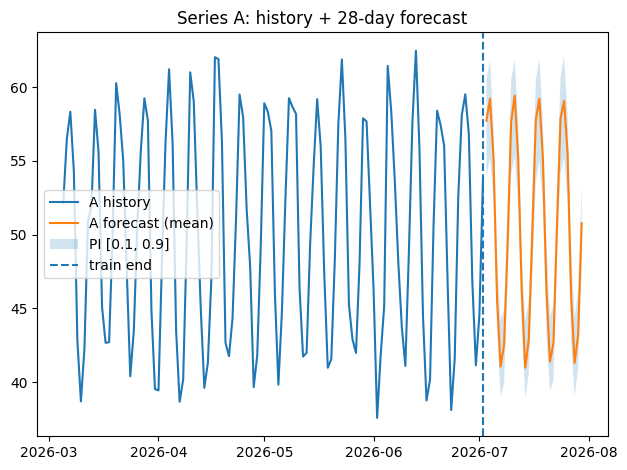

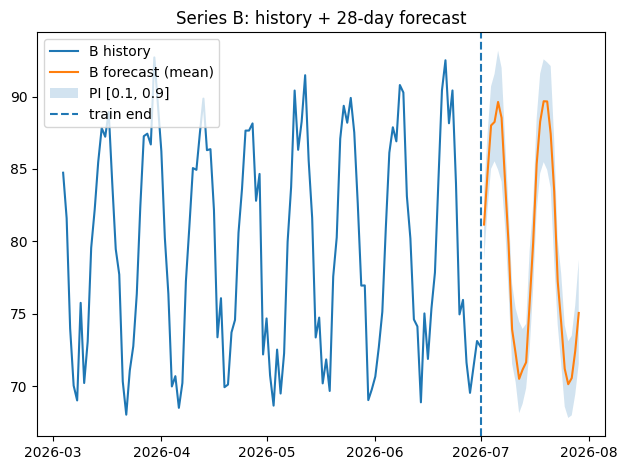

In [90]:
# --- Plot helper ---
def plot_series(item_id: str, history_days: int = 120, lo_q="0.1", hi_q="0.9"):
    # history tail
    hist = ts_train.loc[item_id].reset_index()  # timestamp, target, ...
    hist_tail = hist.tail(history_days)

    # forecast
    fcst = preds.loc[item_id].reset_index()  # timestamp, mean, 0.1, 0.9, ...

    plt.figure()
    plt.plot(hist_tail["timestamp"], hist_tail["target"], label=f"{item_id} history")
    plt.plot(fcst["timestamp"], fcst["mean"], label=f"{item_id} forecast (mean)")

    # Optional: prediction interval if quantile columns exist
    if lo_q in fcst.columns and hi_q in fcst.columns:
        plt.fill_between(fcst["timestamp"], fcst[lo_q], fcst[hi_q], alpha=0.2, label=f"PI [{lo_q}, {hi_q}]")

    plt.axvline(hist_tail["timestamp"].iloc[-1], linestyle="--", label="train end")
    plt.title(f"Series {item_id}: history + {prediction_length}-day forecast")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Plot A and B ---
plot_series("A", history_days=120)
plot_series("B", history_days=120)

# TimeSeriesPredictor predicts quantiles

Quantile prediction means that a model forecasts a range of possible future values, not just a single number.

A quantile answers the question: “Below which value will the target fall with probability q?”

For example, the 0.1 quantile means there is a 10 % chance the true value will be below that 
number.

The 0.5 quantile (median) splits the uncertainty in half: the outcome is equally likely to be above or below it.
This is often more robust than the mean when forecasts are skewed.

A 0.9 quantile means there is a 90 % chance the true value will be below that value.
Only 10 % of outcomes are expected to exceed it.

The interval between two quantiles (for example 0.1 and 0.9) forms a prediction interval.
In this case, the model expects the true value to lie inside that band 80 % of the time.

If the interval is wide, the model is uncertain; if it is narrow, the model is confident.

Quantile forecasts are especially useful when decision-making must account for risk.

They allow planners to choose conservative, average, or aggressive strategies based on different quantiles.

In short, quantile prediction turns forecasting into probabilistic decision support rather than a single-point guess.